File to train the UNet on the virtual machine on the whole dataset

In [15]:
import torch
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from utils.dataset import CocoDataset
from utils.plots import plot_l, plot_model_pred, plot_losses, plot_rgb
from utils.models import UNet, save_model, load_model
from utils.metrics import evaluate_model
from utils.training import train_cnn

device = "cuda" if torch.cuda.is_available() else "cpu"
height, width = 64, 64
path_vm = "../train2014"
transform = transforms.Compose([
    transforms.Resize((height, width)),
    transforms.ToTensor(),
])
dataset = CocoDataset(root=path_vm, transform=transform)
NUM_EPOCHS = 10

Found 82783 images.


In [2]:
device = 'mps'

In [3]:
torch.manual_seed(42)
test_size = int(0.2 * len(dataset))
train_size = len(dataset) - test_size
train, test = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train, batch_size=64, shuffle=True)
test_loader = DataLoader(test, batch_size=64, shuffle=False)

# MSE Loss

controllare quali pezzi dell'imagine sono più facili da riconoscere (pelle, natura, cielo)

In [4]:
torch.manual_seed(42)
model = UNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.999))
criterion1 = nn.MSELoss()

In [5]:
torch.manual_seed(42)
train_losses_mse, test_losses_mse = train_cnn(NUM_EPOCHS, model, criterion1, optimizer, train_loader, test_loader, device,
                                              save_losses=True, save_checkpoints=True, file_name="unet_mse")

Testing: 100%|██████████| 259/259 [01:41<00:00,  2.54it/s]


Epoch 1, Train Loss: 0.0041928693199989155, Validation Loss: 0.0029213222887180027


Testing: 100%|██████████| 259/259 [01:43<00:00,  2.50it/s]


Epoch 2, Train Loss: 0.00282579797875712, Validation Loss: 0.0028075184601154108


Testing: 100%|██████████| 259/259 [01:43<00:00,  2.51it/s]


Epoch 3, Train Loss: 0.0027385021404673655, Validation Loss: 0.0027548997981193327


Testing: 100%|██████████| 259/259 [01:43<00:00,  2.50it/s]


Epoch 4, Train Loss: 0.002678007498644472, Validation Loss: 0.0027149778864486683


Testing: 100%|██████████| 259/259 [01:41<00:00,  2.54it/s]


Epoch 5, Train Loss: 0.002618159598148999, Validation Loss: 0.0027095794409844292


Testing: 100%|██████████| 259/259 [01:41<00:00,  2.56it/s]


Epoch 6, Train Loss: 0.0025498961708126005, Validation Loss: 0.0027041259153411656


Testing: 100%|██████████| 259/259 [01:42<00:00,  2.52it/s]


Epoch 7, Train Loss: 0.0024697673234836633, Validation Loss: 0.002706760268219707


Testing: 100%|██████████| 259/259 [01:42<00:00,  2.52it/s]


Epoch 8, Train Loss: 0.002364994803722498, Validation Loss: 0.002768005383772682


Testing: 100%|██████████| 259/259 [01:41<00:00,  2.55it/s]


Epoch 9, Train Loss: 0.002252830849546525, Validation Loss: 0.0028048542096247198


Testing: 100%|██████████| 259/259 [01:42<00:00,  2.52it/s]

Epoch 10, Train Loss: 0.002133971772827028, Validation Loss: 0.0028226229885384498
Losses saved to losses/unet_mse.txt
Finished Training


In [20]:
save_model(model, "unet_mse_trained")

Model saved to models/unet_mse_trained.pth successfully!


In [25]:
model = load_model(UNet(), "./models/unet_mse_trained.pth")

UNet model loaded successfully!


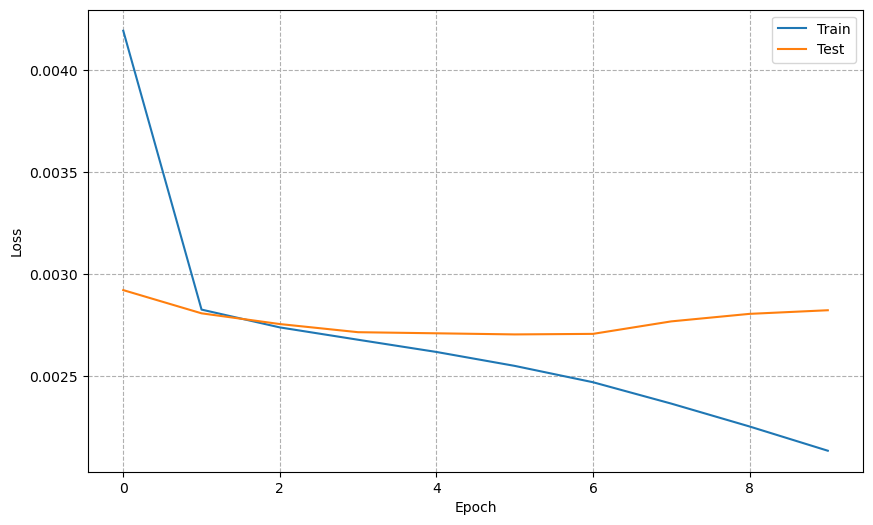

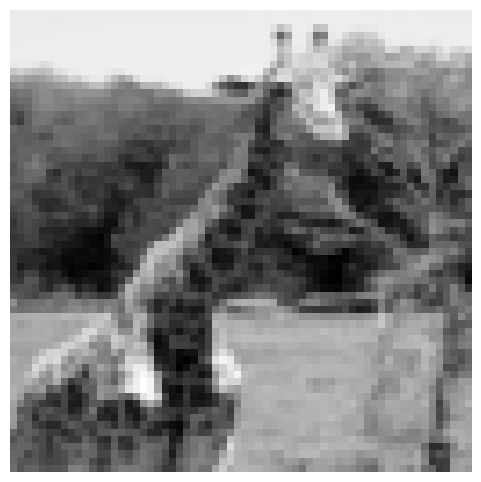

[W NNPACK.cpp:61] Could not initialize NNPACK! Reason: Unsupported hardware.


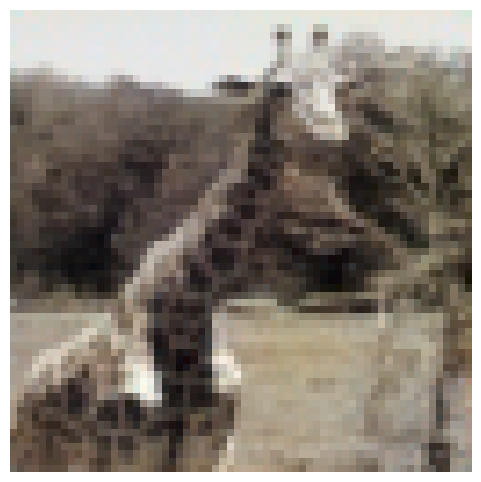

In [26]:
plot_losses(train_losses_mse, test_losses_mse)
plot_l(dataset[76544][1])
plot_model_pred(dataset[76544][1], model, device)

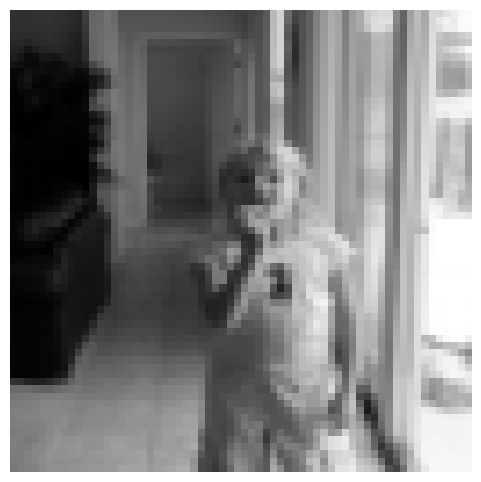

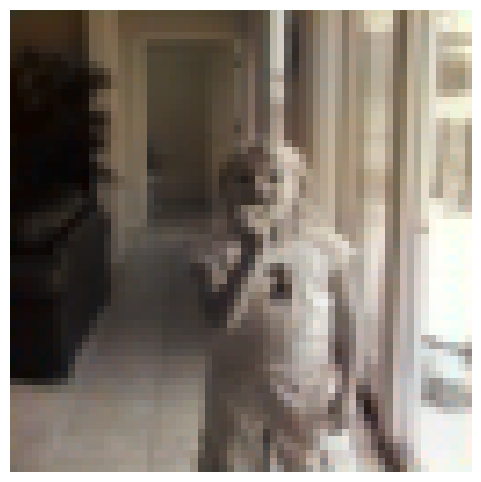

In [29]:
plot_l(dataset[3][1])
plot_model_pred(dataset[3][1], model, device)

In [8]:
torch.manual_seed(42)
avg_mse, std_mse, avg_psnr, std_psnr, avg_ssim, std_ssim, fid = evaluate_model(model, test_loader, device)
print(f"Average MSE, STD: {avg_mse:.4f}, {std_mse:.4f}")
print(f"Average PSNR, STD: {avg_psnr:.4f}, {std_psnr:.4f}")
print(f"Average SSIM, STD: {avg_ssim:.4f}, {std_ssim:.4f}")
print(f"FID: {fid:.4f}")

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /Users/mattiamartino/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:07<00:00, 13.7MB/s] 
/Users/mattiamartino/opt/anaconda3/envs/ML/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


KeyboardInterrupt: 

# L1 Loss

In [ ]:
torch.manual_seed(42)
model = UNet(height, width).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.999))
criterion2 = nn.L1Loss()

In [ ]:
torch.manual_seed(42)
train_losses_l1, test_losses_l1 = train_cnn(NUM_EPOCHS, model, criterion2, optimizer, train_loader, test_loader, device,
                                            save_losses=True, save_checkpoints=True, file_name="unet_l1")

In [ ]:
save_model(model, "unet_l1_trained")

In [ ]:
plot_losses(train_losses_l1, test_losses_l1)
plot_l(dataset[7653][1])
plot_model_pred(dataset[7653][1], model, device)

In [ ]:
torch.manual_seed(42)
avg_mse, std_mse, avg_psnr, std_psnr, avg_ssim, std_ssim, fid = evaluate_model(model, test_loader, device)
print(f"Average MSE, STD: {avg_mse:.4f}, {std_mse:.4f}")
print(f"Average PSNR, STD: {avg_psnr:.4f}, {std_psnr:.4f}")
print(f"Average SSIM, STD: {avg_ssim:.4f}, {std_ssim:.4f}")
print(f"FID: {fid:.4f}")

# L1 Smooth

In [ ]:
torch.manual_seed(42)
model = UNet(height, width).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.999))
criterion3 = nn.SmoothL1Loss()

In [ ]:
torch.manual_seed(42)
train_losses_l1smooth, test_losses_l1smooth = train_cnn(NUM_EPOCHS, model, criterion3, optimizer, train_loader, test_loader, device,
                                                        save_losses=True, save_checkpoints=True, file_name="unet_l1smooth")

In [ ]:
save_model(model, "unet_l1smooth_trained")

In [ ]:
plot_losses(train_losses_l1smooth, test_losses_l1smooth)
plot_l(dataset[7653][1])
plot_model_pred(dataset[7653][1], model, device)

In [ ]:
torch.manual_seed(42)
avg_mse, std_mse, avg_psnr, std_psnr, avg_ssim, std_ssim, fid = evaluate_model(model, test_loader, device)
print(f"Average MSE, STD: {avg_mse:.4f}, {std_mse:.4f}")
print(f"Average PSNR, STD: {avg_psnr:.4f}, {std_psnr:.4f}")
print(f"Average SSIM, STD: {avg_ssim:.4f}, {std_ssim:.4f}")
print(f"FID: {fid:.4f}")